In [18]:
# Example of chaotic migration using dynamical tides operator
import rebound
import reboundx
from matplotlib import pyplot as plt
import matplotlib
import numpy as np
matplotlib.rcParams.update({'font.size': 14})

# intial conditions
a0 = 1.5
e0 = 0.985
R_planet = 1.6 * 4.67e-4 # 1.6 Jupiter radii
m_planet = 1e-3 # approximately 1 Jupiter mass

# create simulation
sim = rebound.Simulation()
sim.add(m=1)
sim.add(m=m_planet, r=R_planet, a=a0, e=e0)
#sim.move_to_com()

# load reboundx and the dynamical tides operator
rebx = reboundx.Extras(sim)
td = rebx.load_force('tides_dynamical')
rebx.add_force(td)

# set dP_crit = 0 to always carry out mode evolution
sim.particles[1].params['td_dP_crit'] = 0

# set initial modes to 0
sim.particles[1].params['td_c_imag'] = 0
sim.particles[1].params['td_c_real'] = 0
sim.particles[1].params['td_num_periapse'] = 0

# record initial orbital energy
o = sim.particles[1].orbit(primary=sim.particles[0])
EB0 = -sim.G * sim.particles[1].m * sim.particles[0].m / (2 * o.a)

N = 5000
t = np.linspace(0, 1e4, N) # time
a = np.zeros(N) # semi-major axis
e = np.zeros(N) # eccentricity
E = np.zeros(N) # mode energy
E_sim = np.zeros(N) # simulation energy
L = np.zeros((N, 3)) # total angular momentum

c_imag = np.zeros(N)
c_real = np.zeros(N)

for i, time in enumerate(t):
    o = sim.particles[1].orbit(primary=sim.particles[0])
    a[i] = o.a
    e[i] = o.e
    L[i, :] = sim.angular_momentum() 
    E[i] = abs(EB0) * (sim.particles[1].params['td_c_imag']**2 + sim.particles[1].params['td_c_real']**2)
    E_sim[i] = sim.energy()
    c_imag[i] = sim.particles[1].params['td_c_imag']
    c_real[i] = sim.particles[1].params['td_c_real']

    if i % 2 == 0 and i != 0:
        print(time, o.a, o.e, E[i], sim.particles[1].params['td_dP_hat'])
    
    sim.integrate(2 * np.pi * time)
    



4.000800160032006 1.499729170783781 0.9849972953949367 6.001489033936678e-08 6.940929507691682
8.001600320064012 1.4999549739911662 0.9849995504205274 9.976084800493969e-09 15.161785656841397
12.002400480096018 1.4990761248452185 0.9849907698139296 2.048168792697128e-07 26.433963745869928
16.003200640128025 1.4985190404969029 0.9849851986435497 5.559982118618998e-07 39.31933343075796
20.004000800160032 1.497125014578533 0.9849712394256901 4.714318415918682e-07 51.96144267545558
24.004800960192036 1.4961759095746565 0.9849617201125361 7.038872002649638e-07 58.80565726462649
28.005601120224043 1.4970277111043409 0.9849702640983121 6.598355963414506e-07 40.7201353620113
32.00640128025605 1.4948133301996225 0.9849480338480868 1.1531252203362473e-06 53.90162680430203
36.00720144028806 1.4945873409243298 0.9849457614349811 8.201968527868897e-07 68.48943136007765
40.008001600320064 1.4944475953238803 0.984944355893625 1.390698259898377e-06 69.26648737562
44.00880176035207 1.491435561566769 0.

In [6]:
#c_imag2, c_real2 = c_imag, c_real

In [47]:
#fig, axes = plt.subplots(2, 1)
#fig.set_figheight(12)
#fig.set_figwidth(7)

#axes[0].scatter(c_imag, c_real, s=5, c=t)
#axes[0].set_ylabel(r"Im($\tilde{c}$)")
#axes[0].set_xlabel(r"Re($\tilde{c}$)")
#axes[1].scatter(c_imag2, c_real2, s=5, c=t)
#axes[1].set_ylabel(r"Im($\tilde{c}$)")
#axes[1].set_xlabel(r"Re($\tilde{c}$)")

#plt.tight_layout()
#plt.savefig("Mode evolution-drag.png", dpi=150)

In [17]:
#t2, a2, e2, E2, E_sim2 = t, a, e, E, E_sim

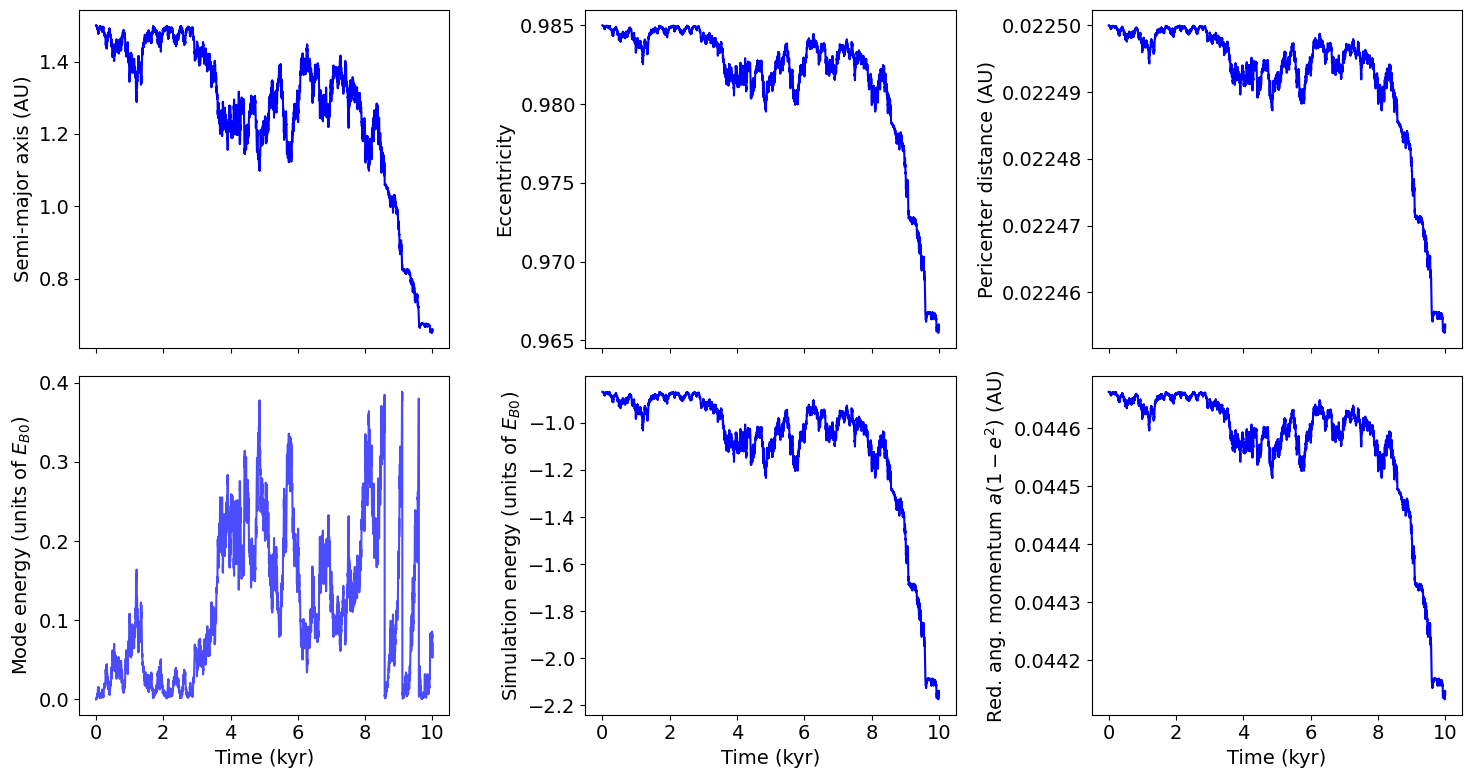

In [19]:
fig, axes = plt.subplots(2, 3, sharex=True)
fig.set_figheight(8)
fig.set_figwidth(15)


axes[0, 0].plot(t / 1e3, a, c='blue')
#axes[0, 0].plot(t2 / 1e3, a2, c='orange')
axes[0, 0].set_ylabel(r'Semi-major axis (AU)')

axes[0, 1].plot(t / 1e3, e, c='blue')
#axes[0, 1].plot(t2 / 1e3, e2, c='orange')
axes[0, 1].set_ylabel(r'Eccentricity')

axes[1, 0].plot(t / 1e3, -E / EB0, alpha=0.7, c='blue')
#axes[1, 0].plot(t2 / 1e3, -E2 / EB0, alpha=0.7, c='orange')
axes[1, 0].set_ylabel(r'Mode energy (units of $E_{B0}$)')
axes[1, 0].set_xlabel(r'Time (kyr)')

axes[1, 1].plot(t / 1e3, -E_sim / EB0, c='blue')
#axes[1, 1].plot(t2 / 1e3, -E_sim2 / EB0, c='orange')
axes[1, 1].set_ylabel(r'Simulation energy (units of $E_{B0}$)')
axes[1, 1].set_xlabel(r'Time (kyr)')

axes[0, 2].plot(t / 1e3, a * (1-e), c='blue')
#axes[0, 2].plot(t2 / 1e3, a2 * (1-e2), c='orange')
axes[0, 2].set_ylabel(r'Pericenter distance (AU)')


#axes[2, 1].plot(t / 1e3, L[:,0])
#axes[2, 1].plot(t / 1e3, L[:,1])
#axes[2, 1].plot(t / 1e3, L[:,2])
axes[1, 2].plot(t / 1e3, a * (1-e**2), c='blue')
#axes[1, 2].plot(t2 / 1e3, a2 * (1-e2**2), c='orange')
axes[1, 2].set_ylabel(r'Red. ang. momentum $a(1-e^2)$ (AU)')
axes[1, 2].set_xlabel(r'Time (kyr)')

plt.tight_layout()
#plt.savefig("peiodicity e975-drag.png", dpi=150)


In [13]:
rp / (R_planet * 10)

array([3.14507495, 3.14980642, 3.15453788, 3.15926935, 3.16400082,
       3.16873229, 3.17346376, 3.17819523, 3.1829267 , 3.18765817,
       3.19238964, 3.1971211 , 3.20185257, 3.20658404, 3.21131551,
       3.21604698, 3.22077845, 3.22550992, 3.23024139, 3.23497285,
       3.23970432, 3.24443579, 3.24916726, 3.25389873, 3.2586302 ,
       3.26336167, 3.26809314, 3.27282461, 3.27755607, 3.28228754,
       3.28701901, 3.29175048, 3.29648195, 3.30121342, 3.30594489,
       3.31067636, 3.31540783, 3.32013929, 3.32487076, 3.32960223,
       3.3343337 , 3.33906517, 3.34379664, 3.34852811, 3.35325958,
       3.35799105, 3.36272251, 3.36745398, 3.37218545, 3.37691692,
       3.38164839, 3.38637986, 3.39111133, 3.3958428 , 3.40057427,
       3.40530573, 3.4100372 , 3.41476867, 3.41950014, 3.42423161,
       3.42896308, 3.43369455, 3.43842602, 3.44315748, 3.44788895,
       3.45262042, 3.45735189, 3.46208336, 3.46681483, 3.4715463 ,
       3.47627777, 3.48100924, 3.4857407 , 3.49047217, 3.49520

In [17]:
M = 50
N = 50
e = np.linspace(0.96, 0.995, M)
rp = np.linspace(0.025, 0.030, N)
a_initial = np.zeros((M, N))
a_final = np.zeros((M, N))
count = 0

for i, e0 in enumerate(e):
    for j, rp0 in enumerate(rp):
        # intial conditions
        a0 = rp0 / (1 - e0)
        R_planet = 1.6 * 4.67e-4 # 1.6 Jupiter radii
        m_planet = 1e-3 # approximately 1 Jupiter mass

        #print(a0, e0)
        
        # create simulation
        sim = rebound.Simulation()
        sim.add(m=1)
        sim.add(m=m_planet, r=R_planet, a=a0, e=e0)
        sim.move_to_com()
        
        # load reboundx and the dynamical tides operator
        rebx = reboundx.Extras(sim)
        td = rebx.load_force('tides_dynamical')
        rebx.add_force(td)
        
        # set dP_crit = 0 to always carry out mode evolution
        sim.particles[1].params['td_dP_crit'] = 0
        
        # set initial modes to 0
        sim.particles[1].params['td_c_imag'] = 0
        sim.particles[1].params['td_c_real'] = 0

        sim.particles[1].params['td_num_periapse'] = 0
        
        # record initial orbital energy
        o = sim.particles[1].orbit(primary=sim.particles[0])
        EB0 = -sim.G * sim.particles[1].m * sim.particles[0].m / (2 * o.a)

        t = np.linspace(0, 1e3, 100)
        
        for _, time in enumerate(t):
            sim.integrate(2 * np.pi * time)
            o = sim.particles[1].orbit(primary=sim.particles[0])
            if sim.particles[1].params['td_num_periapse'] >= 1000 or o.a <= 0.04:
                if o.a <= 0.04:
                    print("Killed")
                break
                
        o = sim.particles[1].orbit(primary=sim.particles[0])
        a_initial[i, j] = a0
        a_final[i, j] = o.a
        count += 1
        print(count)
        



1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


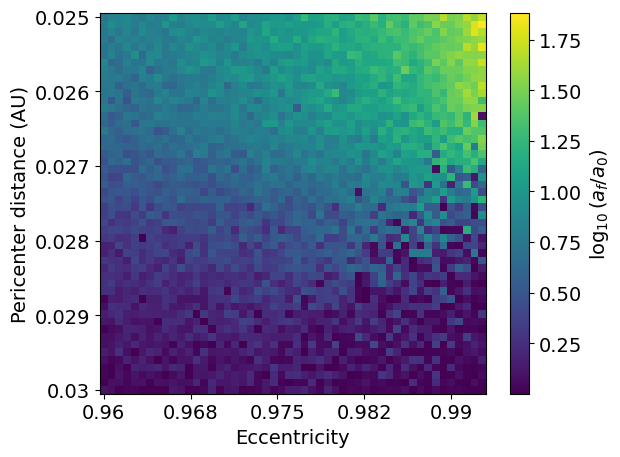

In [20]:
data = np.log10(a_initial / a_final)

# Create a heatmap
plt.imshow(data.T, cmap='viridis', aspect='auto', origin='upper')

# Add color bar
plt.colorbar(label=r'$\log_{10}(a_f / a_0)$')

# Set axis labels
plt.xlabel(r'Eccentricity')  # x-axis label
plt.ylabel(r'Pericenter distance (AU)')  # y-axis label

# Create the desired x-tick labels
x_ticks_labels = np.round(np.linspace(0.96, 0.99, num=5), 3)

# Map these labels to the actual positions in the data
x_positions = np.linspace(0, data.shape[1] - 5, num=5)

# Set x-ticks with the mapped positions and labels
plt.xticks(x_positions, x_ticks_labels)

y_ticks = np.around(np.linspace(0.025, 0.030, num=6), 3)  # Create 6 points between 0.022 and 0.027
plt.yticks(np.linspace(0, data.shape[0] - 1, num=6), y_ticks)

plt.tight_layout()
plt.savefig("migration heatmap-drag.png", dpi=150)

In [114]:
print(e[0], rp[-1])
print(data[0, -1])

0.95 0.027
0.020801722217363306
